# Importing the Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('/content/Bankloan.csv', index_col="ID")

In [3]:
df.head(10)

,Age,Gender,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Home Ownership,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,,,,,,,,,,,,,,,
1,25,NaN,1,49.0,91107,4,1.6,1,0,NaN,0.0,1,0,0.0,0
2,45,NaN,19,34.0,90089,3,1.5,1,0,NaN,0.0,1,0,0.0,0
3,39,NaN,15,11.0,94720,1,1.0,1,0,NaN,0.0,0,0,0.0,0
4,35,NaN,9,100.0,94112,1,2.7,2,0,NaN,0.0,0,0,0.0,0
5,35,NaN,8,45.0,91330,4,1.0,2,0,NaN,0.0,0,0,0.0,1
6,37,NaN,13,29.0,92121,4,0.4,2,155,NaN,0.0,0,0,1.0,0
7,53,NaN,27,72.0,91711,2,1.5,2,0,NaN,0.0,0,0,1.0,0
8,50,NaN,24,22.0,93943,1,0.3,3,0,NaN,0.0,0,0,0.0,1
9,35,NaN,10,81.0,90089,3,0.6,2,104,NaN,0.0,0,0,1.0,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Gender              480 non-null    object 
 2   Experience          5000 non-null   int64  
 3   Income              4933 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Home Ownership      480 non-null    object 
 10  Personal Loan       4999 non-null   float64
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              4960 non-null   float64
 14  CreditCard          5000 non-null   int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 625.0+

## Checking the null values in the dataset

In [5]:
df.isnull().sum()

Age                      0
Gender                4520
Experience               0
Income                  67
ZIP Code                 0
Family                   0
CCAvg                    0
Education                0
Mortgage                 0
Home Ownership        4520
Personal Loan            1
Securities Account       0
CD Account               0
Online                  40
CreditCard               0
dtype: int64

### From above mentioned it is found that the columns (Gender, Income, Home Ownership, Personal Loan and Online) had the missing values in the respective columns
The null values present in the columns are handled using mean for income and mode for remaining column.

In [6]:
df['Income'].fillna(df['Income'].mean(), inplace=True)

In [7]:
df['Gender'].fillna(df['Gender'].mode()[0], inplace=True)
df['Home Ownership'].fillna(df['Home Ownership'].mode()[0], inplace=True)
df['Personal Loan'].fillna(df['Personal Loan'].mode()[0], inplace=True)
df['Online'].fillna(df['Online'].mode()[0], inplace=True)

### The dataset has two categorical data for Gender and Home Ownership column

In [8]:
df['Home Ownership'].value_counts()

Home Mortage    4739
Home Owner       138
Rent             123
Name: Home Ownership, dtype: int64

Here we can see the categories present in the Home Ownership are Home Mortgage, Home Owner and Rent

In [9]:
df['Gender'].value_counts()

M    4826
F     141
O      33
Name: Gender, dtype: int64

In [10]:
df['Education'].value_counts()

1    2096
3    1501
2    1403
Name: Education, dtype: int64

Here we can se the categories present in the Gender are M, F and O that represents male, female and others.

Checking outliers in the dataset
Outlier is the abnormal data present in the dataset.

Age                      Axes(0.125,0.53;0.0945122x0.35)
Experience            Axes(0.238415,0.53;0.0945122x0.35)
Income                Axes(0.351829,0.53;0.0945122x0.35)
ZIP Code              Axes(0.465244,0.53;0.0945122x0.35)
Family                Axes(0.578659,0.53;0.0945122x0.35)
CCAvg                 Axes(0.692073,0.53;0.0945122x0.35)
Education             Axes(0.805488,0.53;0.0945122x0.35)
Mortgage                 Axes(0.125,0.11;0.0945122x0.35)
Personal Loan         Axes(0.238415,0.11;0.0945122x0.35)
Securities Account    Axes(0.351829,0.11;0.0945122x0.35)
CD Account            Axes(0.465244,0.11;0.0945122x0.35)
Online                Axes(0.578659,0.11;0.0945122x0.35)
CreditCard            Axes(0.692073,0.11;0.0945122x0.35)
dtype: object

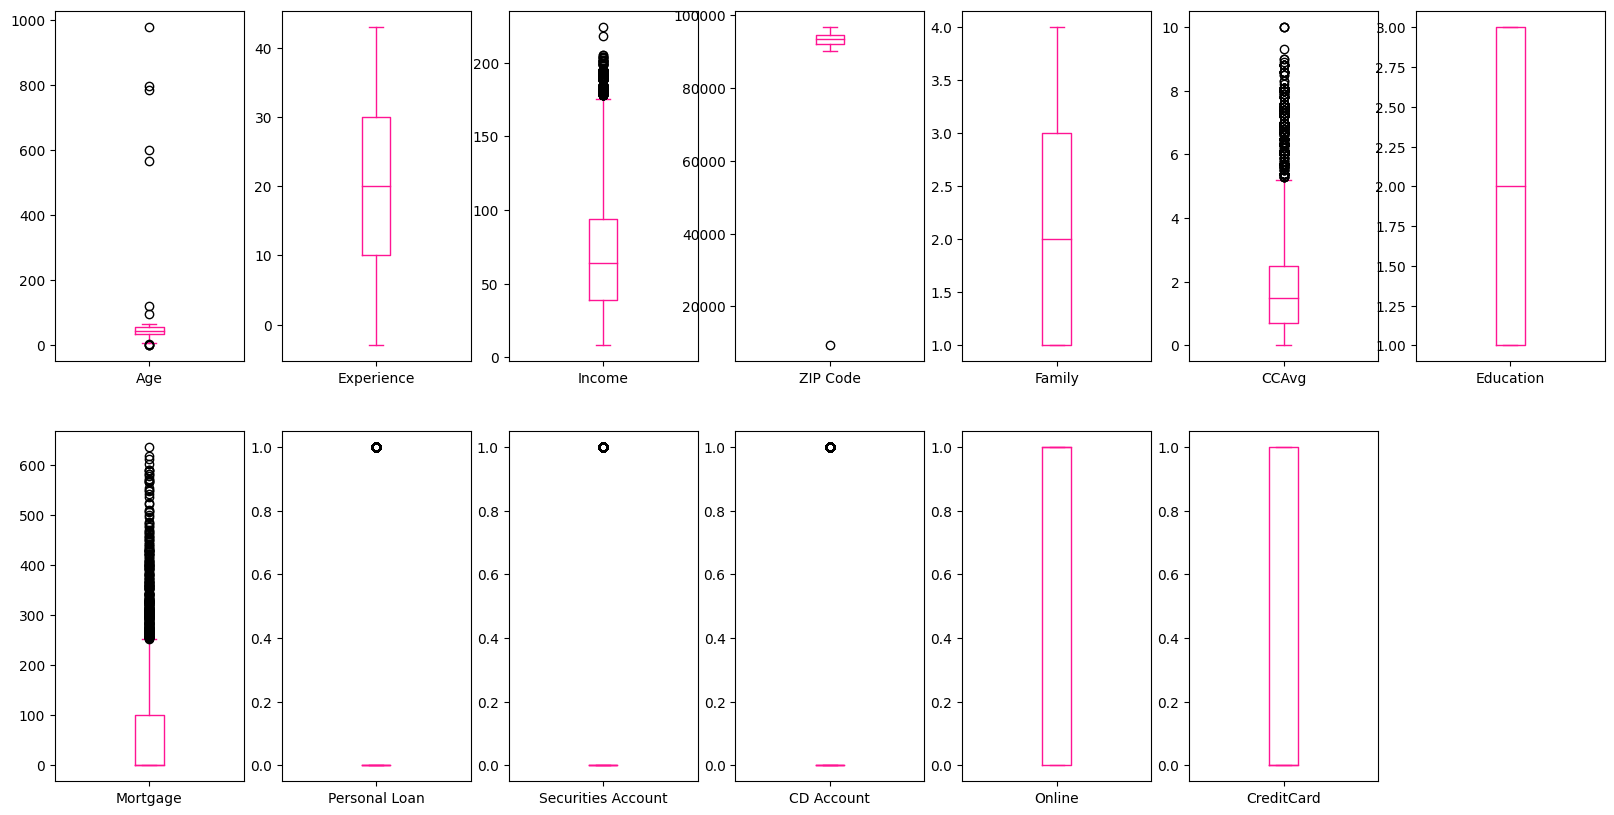

In [11]:
df.plot(kind='box', subplots=True, layout=(2,7),sharex=False,sharey=False, figsize=(20, 10), color='deeppink')

From the above generated box plot it can be observed that there are few columns with the outliers.
These outlier fall outside of the whisker of the box plot.
There columns with detected outliers are Age, Income, ZIP Code, CCAvg, Mortgage, Personal Loan, Securities Account and CD Account

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 1 to 5000
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Gender              5000 non-null   object 
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   float64
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Home Ownership      5000 non-null   object 
 10  Personal Loan       5000 non-null   float64
 11  Securities Account  5000 non-null   int64  
 12  CD Account          5000 non-null   int64  
 13  Online              5000 non-null   float64
 14  CreditCard          5000 non-null   int64  
dtypes: float64(4), int64(9), object(2)
memory usage: 625.0+

In [13]:
df['Personal Loan']=df['Personal Loan'].astype(int)
df['Online']=df['Online'].astype(int)

# Visualization

## Count plot for Gender column

[Text(0, 0, '4826'), Text(0, 0, '141'), Text(0, 0, '33')]

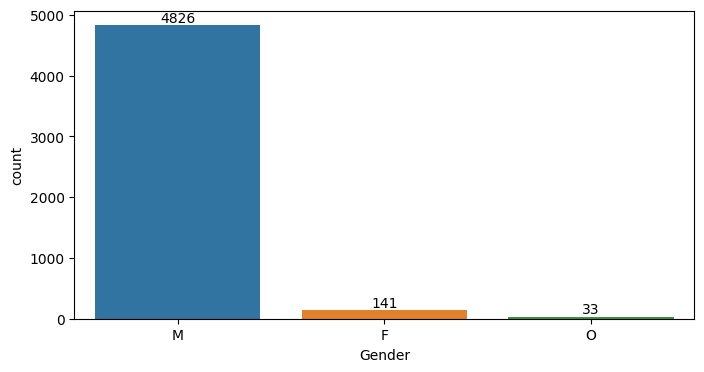

In [14]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Gender")
values = df['Gender'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)
# plt.xticks(rotation=90)

From the count plot we can observe that the number of male is highest in the dataset where lowest count is given by others category

## Countplot for Home Ownership

[Text(0, 0, '4739'), Text(0, 0, '138'), Text(0, 0, '123')]

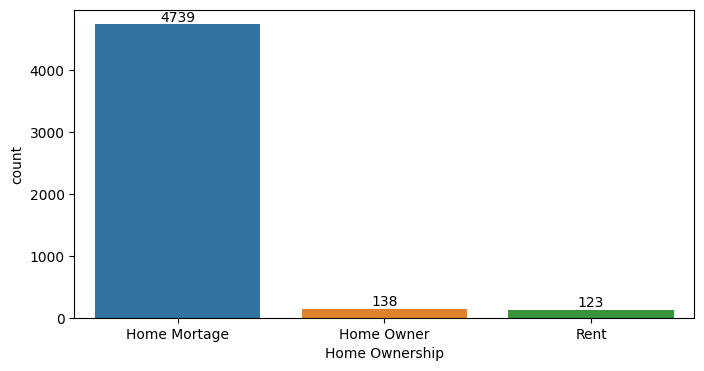

In [15]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Home Ownership")
values = df['Home Ownership'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Here we can observe that the number of home ownership having the mortagage for the home is maximum of all and the rent is the minimum one

## Distplot for Experience

Text(0.5, 1.0, 'Loan experience')

<Figure size 600x400 with 0 Axes>

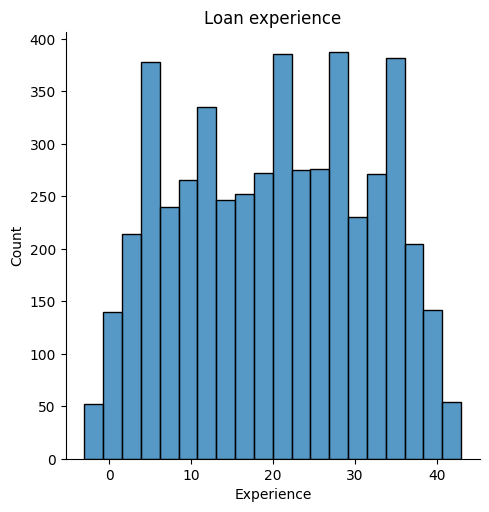

In [16]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Experience'])
plt.xlabel('Experience')
plt.title('Loan experience')

Experience represents the number of professional year of experience. Distplot shows the range of the experience with their count, the maximum here has the range of above 27-30

## Countplot for Creditcard

[Text(0, 0, '3530'), Text(0, 0, '1470')]

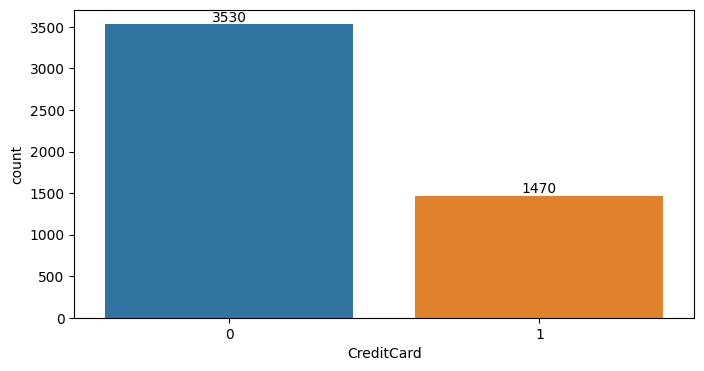

In [17]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="CreditCard")
values = df['CreditCard'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Credit card column represents if the customer use the credit card issued by the universal bank. According to the visualization, it is observed that maximum number of customer does not use the credit card.

## Countplot for Online

Online column represents if the customer uses the internet banking facilities

[Text(0, 0, '3001'), Text(0, 0, '1999')]

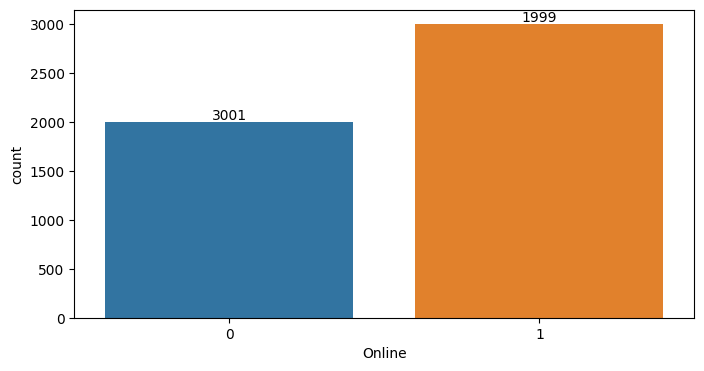

In [18]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Online")
values = df['Online'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

From the given countplot, we can observe that the number of customer using the internet banking facilities is maximum than those who don't use.

## Distplot for Income

Text(0.5, 1.0, 'Income earned')

<Figure size 600x400 with 0 Axes>

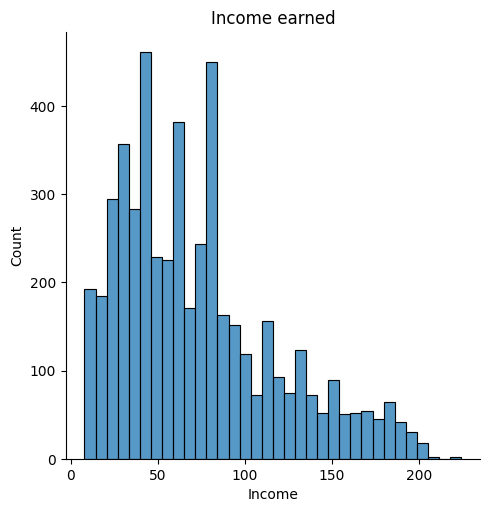

In [19]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Income'])
plt.xlabel('Income')
plt.title('Income earned')

Here it is observed that the maximum customer has the income ranging from 45-50k in dollars

## Distplot for CCAvg

Text(0.5, 1.0, 'Average spending on credit card per month')

<Figure size 600x400 with 0 Axes>

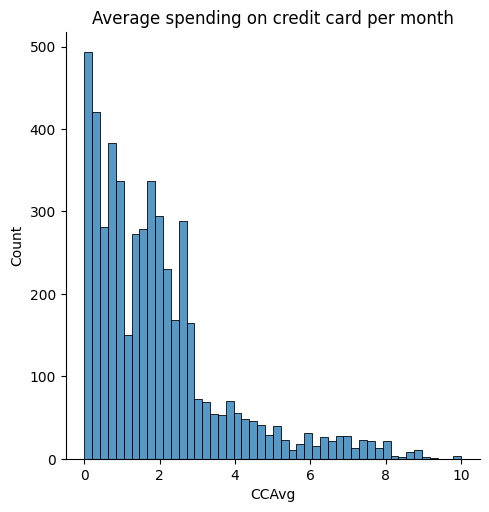

In [20]:
plt.figure(figsize=(6,4))
sns.displot(x=df['CCAvg'])
plt.xlabel('CCAvg')
plt.title('Average spending on credit card per month')

(array([1683., 1376., 1039.,  319.,  219.,   97.,  132.,   84.,   45.,
           6.]),
 array([ 0.,  1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10.]),
 <BarContainer object of 10 artists>)

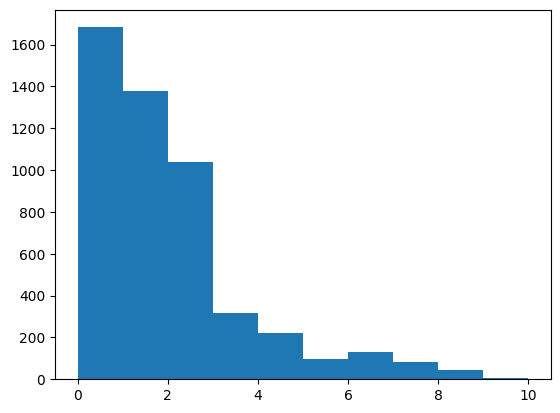

In [21]:
plt.hist(df['CCAvg'])

For Average spending on credit card by the customer per month the maximum average spending ranges between 0 and 1 ($000)

## Countplot for family size

[Text(0, 0, '1472'),
 Text(0, 0, '1296'),
 Text(0, 0, '1222'),
 Text(0, 0, '1010')]

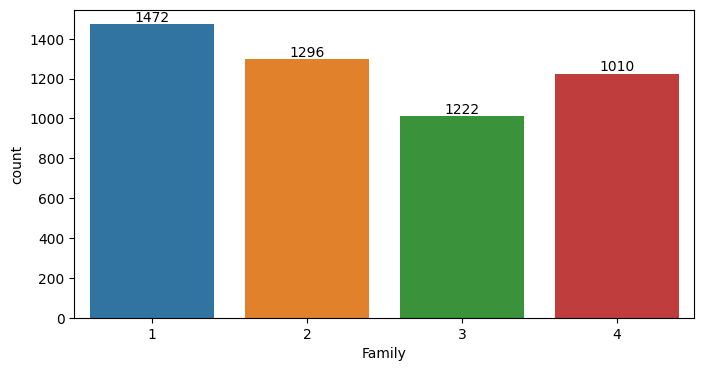

In [22]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Family")
values = df['Family'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

The countplot shows the number of customer with their family size.

## Countplot for the customer with their education background

[Text(0, 0, '2096'), Text(0, 0, '1501'), Text(0, 0, '1403')]

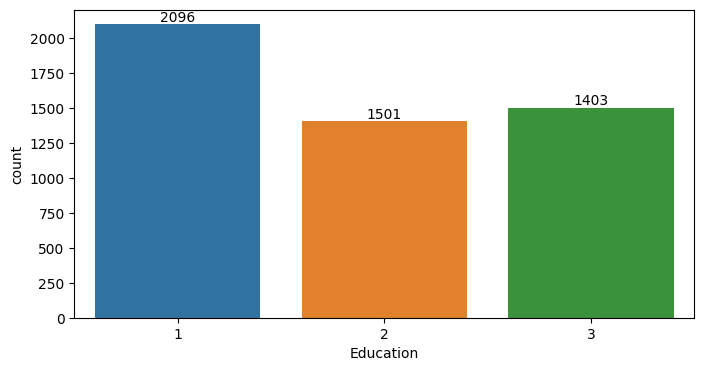

In [23]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Education")
values = df['Education'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional
With this level it can be observed that the count of customer having the education background of Undergraduate has the maximum count and Advanced/Professional has the minimum count.

Text(0.5, 9.444444444444438, 'Mortgage')

<Figure size 600x400 with 0 Axes>

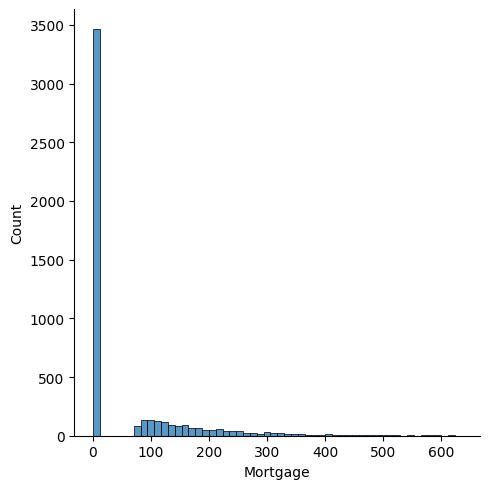

In [24]:
plt.figure(figsize=(6,4))
sns.displot(x=df['Mortgage'])
plt.xlabel('Mortgage')
# plt.title('Average spending on credit card per month')

(array([3462.,  566.,  428.,  254.,  127.,   73.,   46.,   20.,   14.,
          10.]),
 array([  0. ,  63.5, 127. , 190.5, 254. , 317.5, 381. , 444.5, 508. ,
        571.5, 635. ]),
 <BarContainer object of 10 artists>)

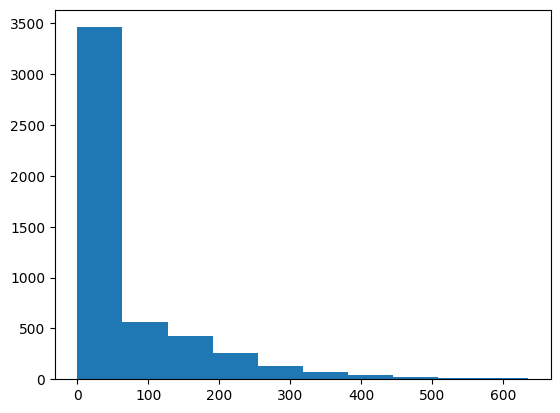

In [25]:
plt.hist(df['Mortgage'])

## Countplot for Securities Account

This column represents if the customer has the securities account with the bank

[Text(0, 0, '4478'), Text(0, 0, '522')]

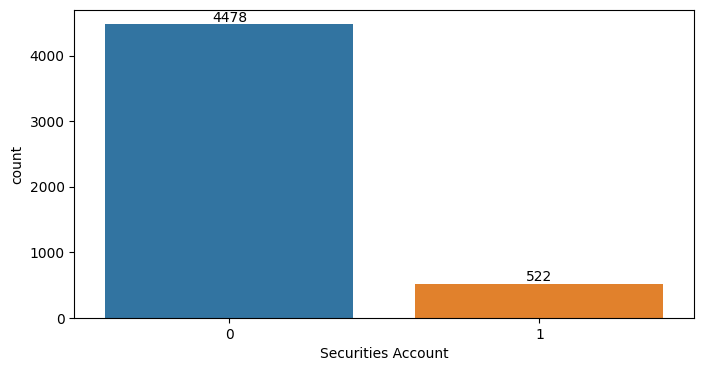

In [26]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Securities Account")
values = df['Securities Account'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Here in the countplot it is observed that the maximum number of the customer don't have the securities account

## Countplot for CD Account

This column represent the Certificate of deposit with the bank

[Text(0, 0, '4698'), Text(0, 0, '302')]

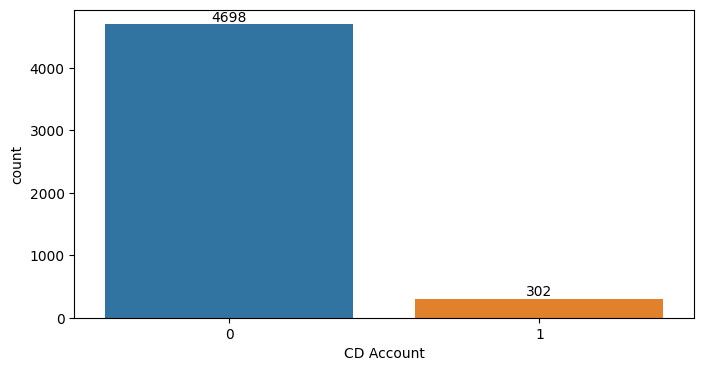

In [27]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="CD Account")
values = df['CD Account'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Here we can see that maximum number of the customer does not have the certificate of Deposit with the bank

## Countplot for Personal Loan

This column represents if the customer accept the personal loan offered in the last campaign?

[Text(0, 0, '4521'), Text(0, 0, '479')]

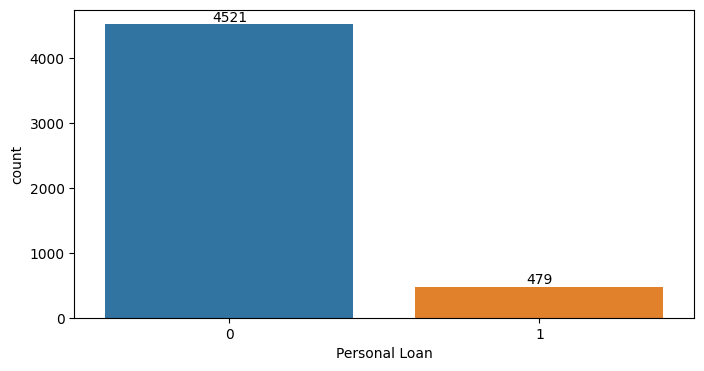

In [28]:
plt.figure(figsize=(8,4), dpi=100)
ax=sns.countplot(data=df, x="Personal Loan")
values = df['Personal Loan'].value_counts().values
ax.bar_label(container=ax.containers[0], labels=values)

Here we can see that maximum number of the customer did not accept the personal loan offered in the last campaign

## Multivariate Analysis

## Did the customer accept the personal loan with respect to the education of respective customer?

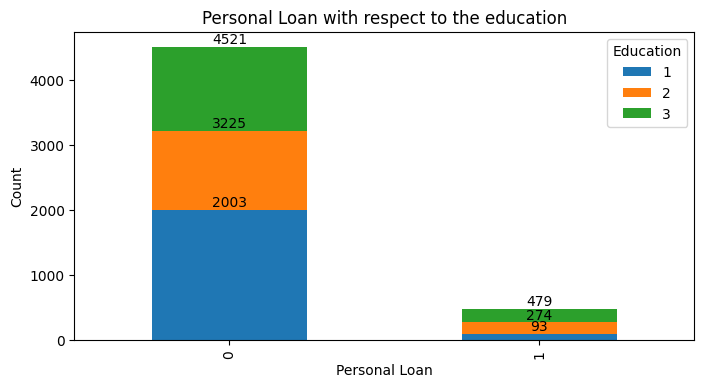

In [29]:
fig, ax=plt.subplots(figsize=(8,4))

grouped_data = df.groupby(['Personal Loan', 'Education']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Personal Loan')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to the education')
ax.legend(title='Education')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)


Here we can see that the maximum number of customer did not accept the personal loan for all 3 level of education mentioned in the dataset.
Education Level. 1: Undergrad; 2: Graduate; 3: Advanced/Professional

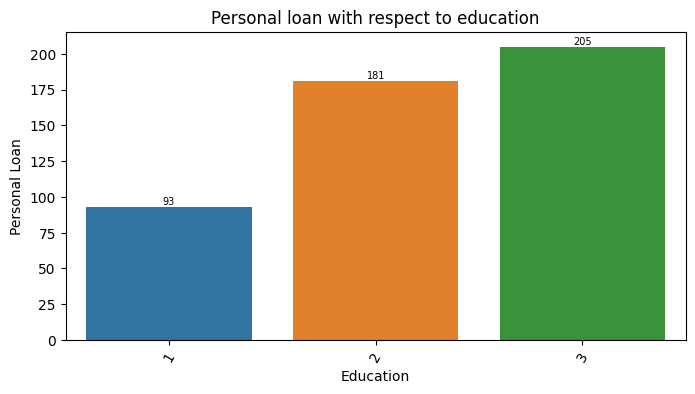

In [30]:
plt.figure(figsize=(8,4))
avg_age = df.groupby('Education')['Personal Loan'].sum().reset_index()
g = sns.barplot(data=avg_age, x='Education', y='Personal Loan')
for v in avg_age.itertuples():
    g.text(x=v.Index, y=v._2, s=str(round(v._2, 2)), ha="center", va="bottom", fontsize=7)
plt.xticks(rotation=60)
plt.title('Personal loan with respect to education')
plt.show()

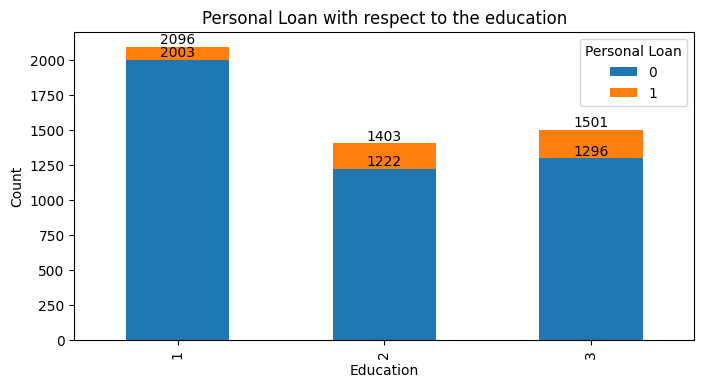

In [31]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Education', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Education')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to the education')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

## The count of customer who uses credit card isued by the Universal Bank if the customer accept the personal loan offered in the last campaign or otherwise.

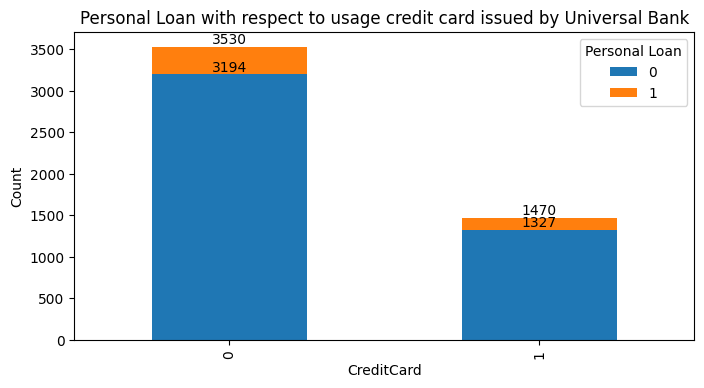

In [32]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['CreditCard', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('CreditCard')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to usage credit card issued by Universal Bank')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here it can be observed that the customer who doesnot accept the personal loan offer has the maximum count for not using the credit card. However, those customer who has maximum count of not accepting the personal loan has the maximum count of not using the credit card.

## Number of customer who have Certificate of Deposit with the bank if the customer accept the personal loan offered in the last campaign or otherwise.

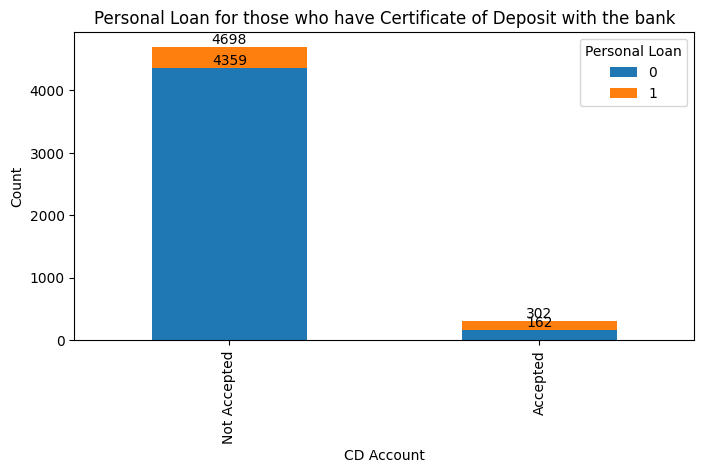

In [100]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['CD Account', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('CD Account')
ax.set_ylabel('Count')
ax.set_title('Personal Loan for those who have Certificate of Deposit with the bank')
ax.legend(title='Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here it can be observed that the maximum customer does not have the certicate and is not accepting the personal loan offered in the last campaign.

## Number of customer who use Internet banking services and those who accept the personal loan or otherwise

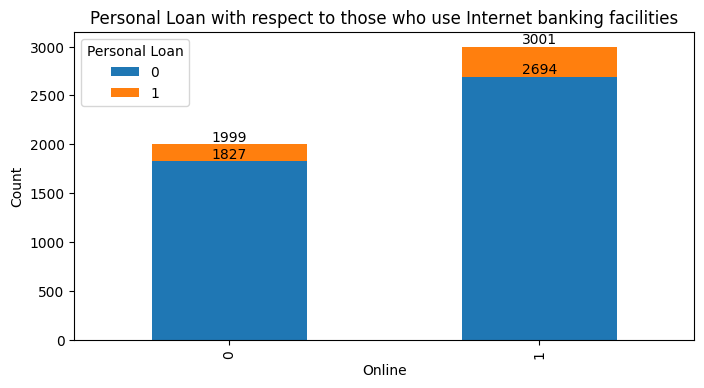

In [102]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Online', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Online')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to those who use Internet banking facilities')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here we can observe that the number of customer who doesnot accept the personal loan for those who use internet banking facilities is higher than that of the ones who does not use the internet services

## Customer accepting the personal loan with respect to the security account and otherwise

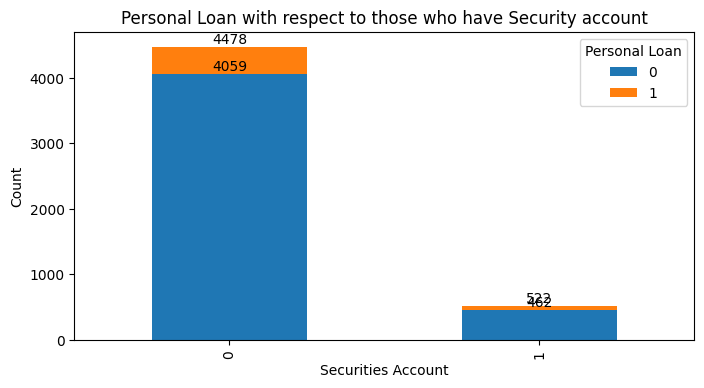

In [35]:
fig, ax=plt.subplots(figsize=(8,4))
grouped_data = df.groupby(['Securities Account', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Securities Account')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to those who have Security account')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here we can see that there are maximum customer who does not accept the personal loan for customer having both security account and who does not have security account.

## Customer accepting personal loans with respect to the family size.

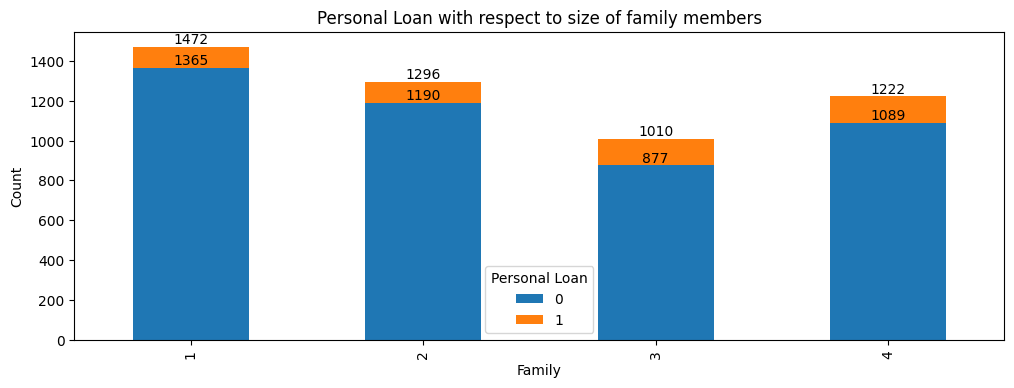

In [36]:
fig, ax=plt.subplots(figsize=(12,4))
grouped_data = df.groupby(['Family', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Family')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to size of family members')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here it can be observed that for those with family size 1 has the maximum customer for not accepting the personal loan and for size 3 has maximum customers for accepting the loan.

## Customer accepting the personal loan with respect to Home ownership or otherwise

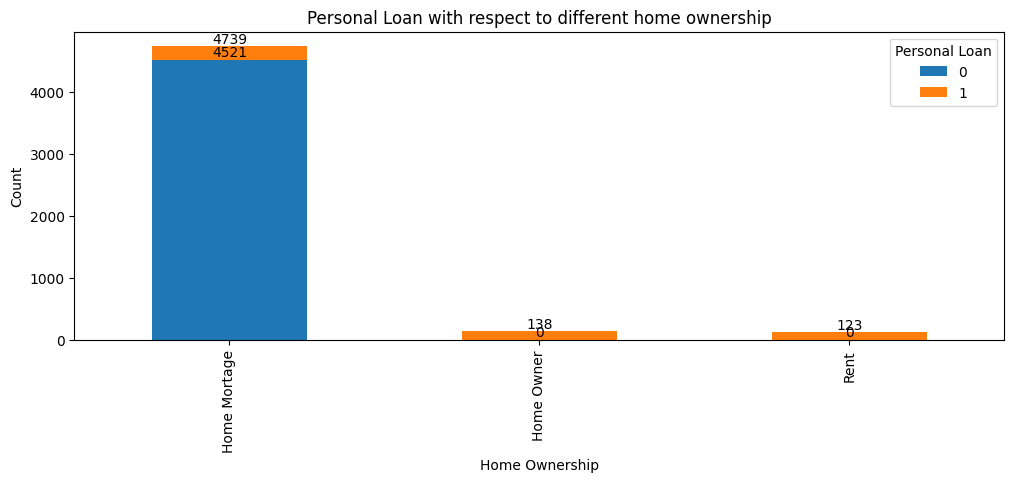

In [37]:
fig, ax=plt.subplots(figsize=(12,4))
grouped_data = df.groupby(['Home Ownership', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Home Ownership')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to different home ownership')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

Here we can observe that the maximum number of customer from home mortgage did not accept the personal loan.

## Accepting the personal loan with respect to the gender or otherwise

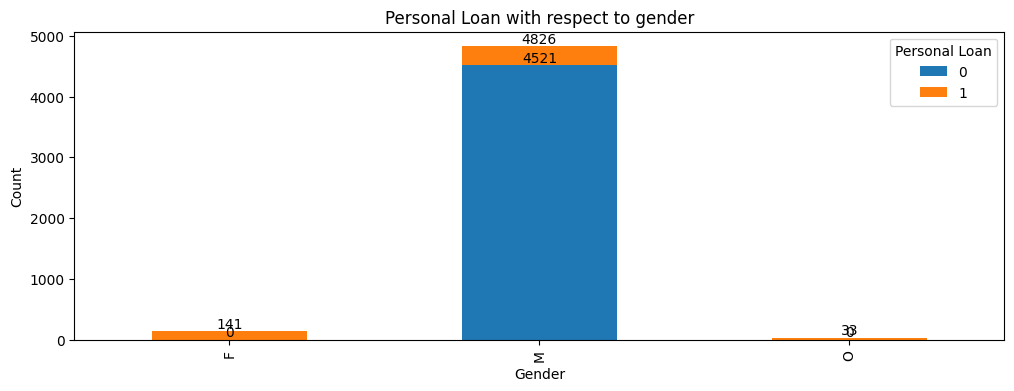

In [38]:
fig, ax=plt.subplots(figsize=(12,4))
grouped_data = df.groupby(['Gender', 'Personal Loan']).size().unstack()

grouped_data.plot(kind='bar', stacked=True, ax=ax)
ax.set_xlabel('Gender')
ax.set_ylabel('Count')
ax.set_title('Personal Loan with respect to gender')
ax.legend(title='Personal Loan')
# plt.show()
for container in ax.containers:
    ax.bar_label(container)

 With the above mentioned visualization it can be observed that maximum customer are male who does not accept the personal loan and also comparatively male has accepted the loan.

## Accepting of Personal loan with respect to the income

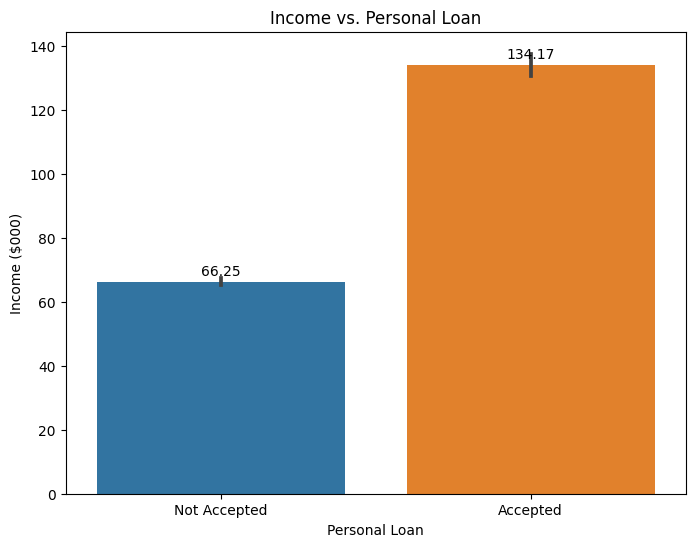

In [105]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='Income', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Income ($000)')
plt.title('Income vs. Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for index, value in enumerate(df.groupby('Personal Loan')['Income'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()

We can observe that the the height of each bar represents the average of the income where is is seen that accepted ones is maximum.

## Accepting of the personal loan with respect to the professional experience by the customer.

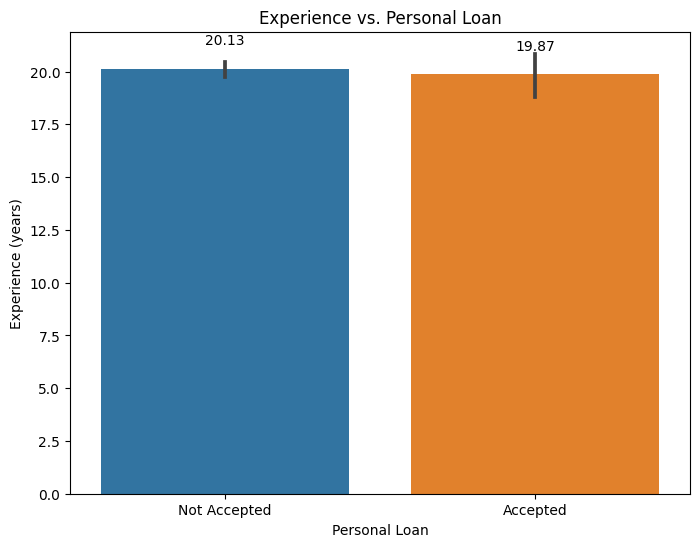

In [106]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='Experience', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Experience (years)')
plt.title('Experience vs. Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for index, value in enumerate(df.groupby('Personal Loan')['Experience'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()

Here the maximum customer has not accepted the offer of personal loan.

## Accepting of personal loan with respect to the mortgage.

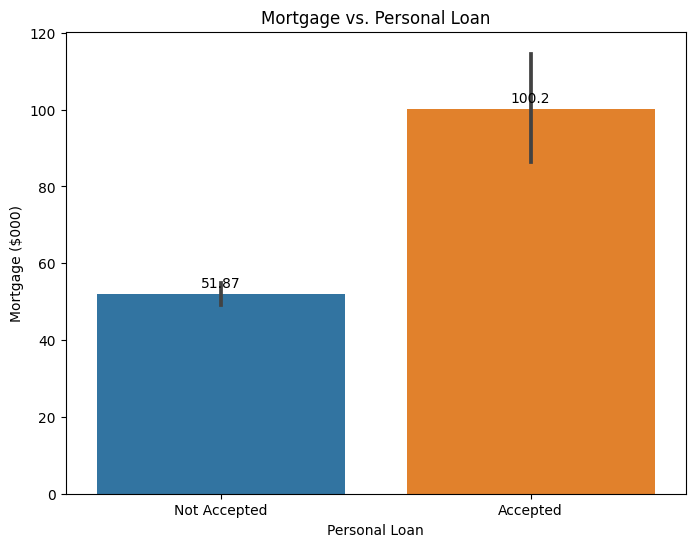

In [107]:
plt.figure(figsize=(8, 6))
sns.barplot(x='Personal Loan', y='Mortgage', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage vs. Personal Loan')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
for index, value in enumerate(df.groupby('Personal Loan')['Mortgage'].mean().round(2)):
    plt.text(index, value + 1, str(value), ha='center', va='bottom')
plt.show()

# Multivariate Analysis

## Average Income Across Education Levels and Personal Loan Acceptance

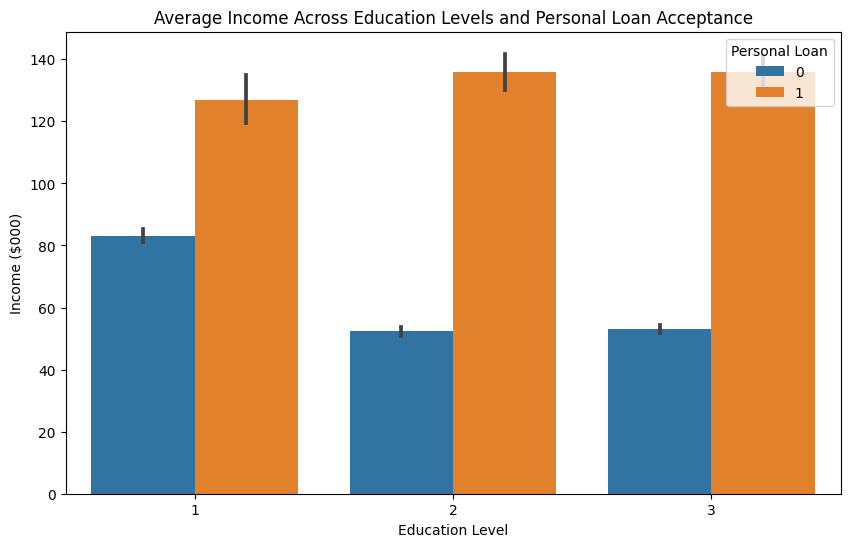

In [48]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Education Level')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Education Levels and Personal Loan Acceptance')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average Income Across Size of Family and Personal Loan Acceptance

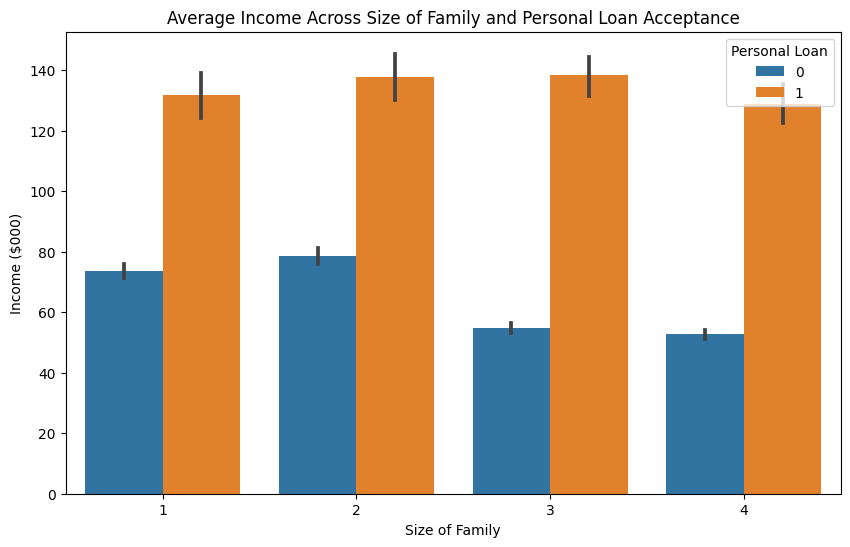

In [49]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Size of Family')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Size of Family and Personal Loan Acceptance')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average Income Across Gender and Personal Loan Acceptance

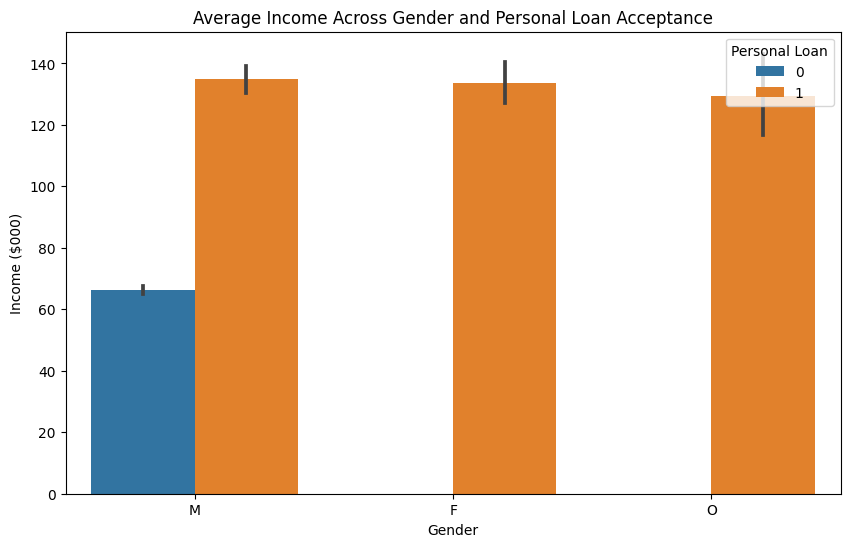

In [50]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Gender')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Gender and Personal Loan Acceptance')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## 'Average Income Across Home Ownership and Personal Loan Acceptance'

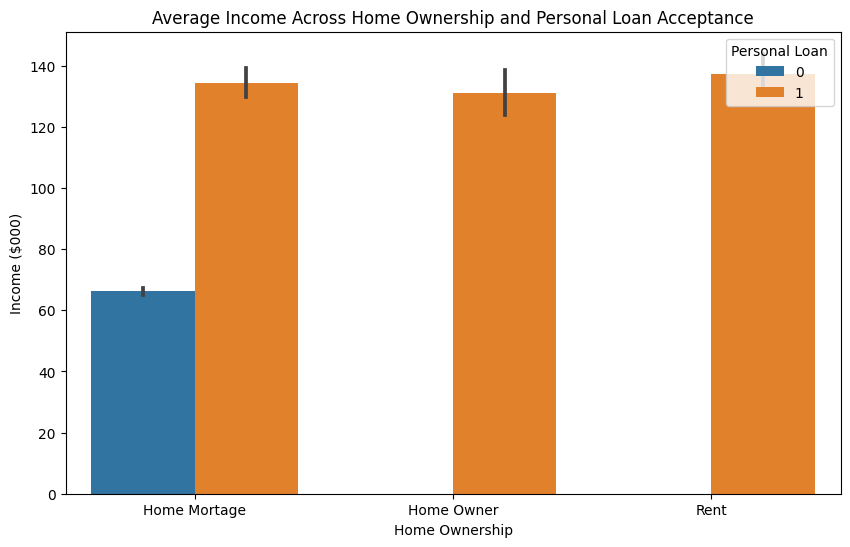

In [51]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Home Ownership', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Home Ownership')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Home Ownership and Personal Loan Acceptance')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average Income Across Education Levels and Personal Loan Acceptance

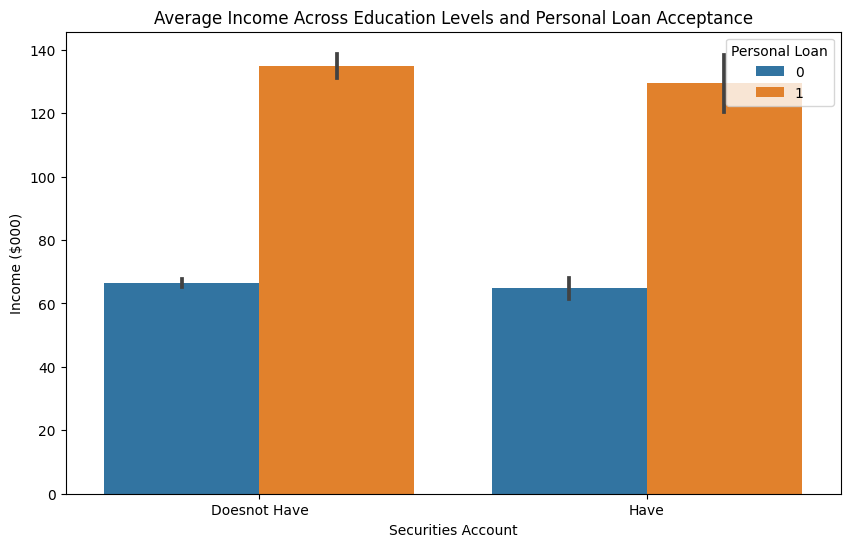

In [52]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Securities Account', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Securities Account')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Education Levels and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average Income Across CD Account and Personal Loan Acceptance

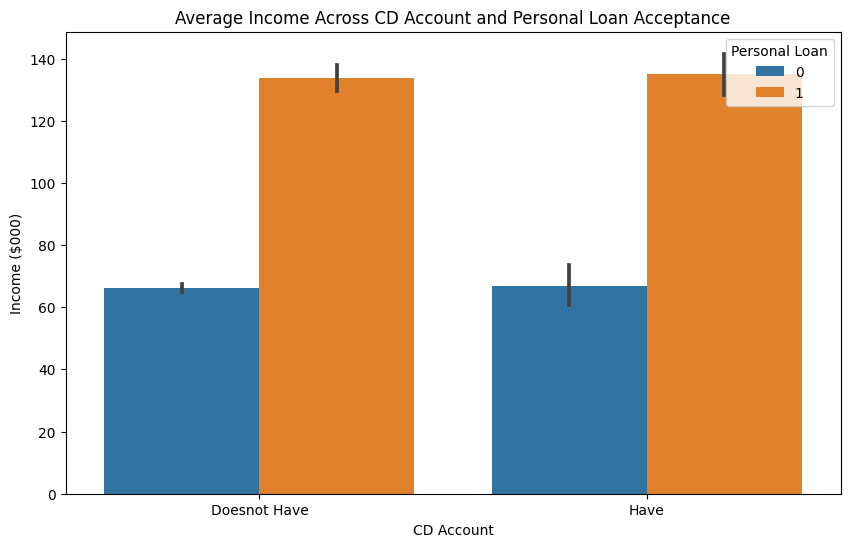

In [53]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CD Account', y='Income', hue='Personal Loan', data=df)
plt.xlabel('CD Account')
plt.ylabel('Income ($000)')
plt.title('Average Income Across CD Account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average Income Across Online and Personal Loan Acceptance

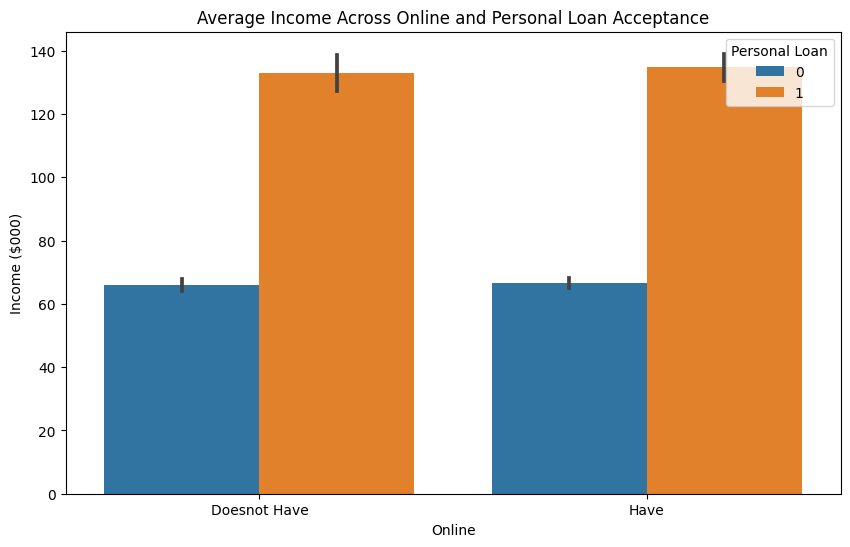

In [54]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Online', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Online')
plt.ylabel('Income ($000)')
plt.title('Average Income Across Online and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average Income Across CreditCard and Personal Loan Acceptance

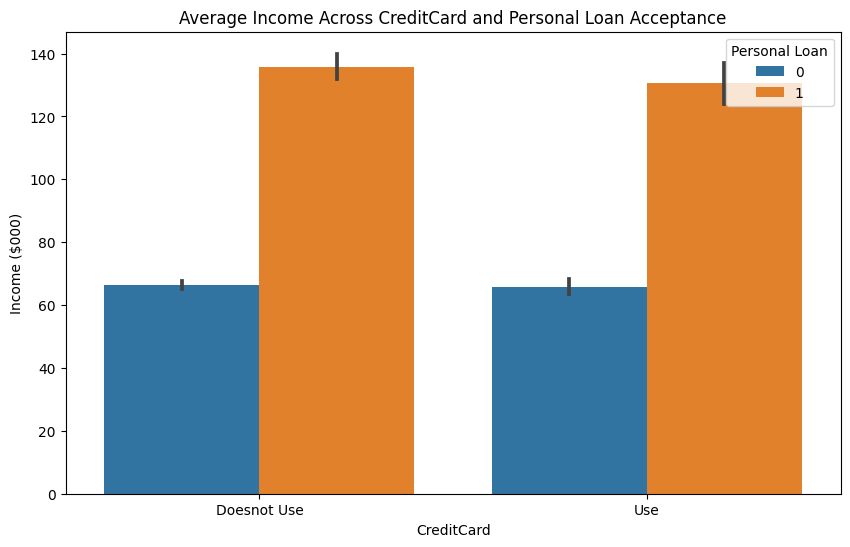

In [56]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CreditCard', y='Income', hue='Personal Loan', data=df)
plt.xlabel('CreditCard')
plt.ylabel('Income ($000)')
plt.title('Average Income Across CreditCard and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Use', 'Use'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Correlation matrix for numeric column

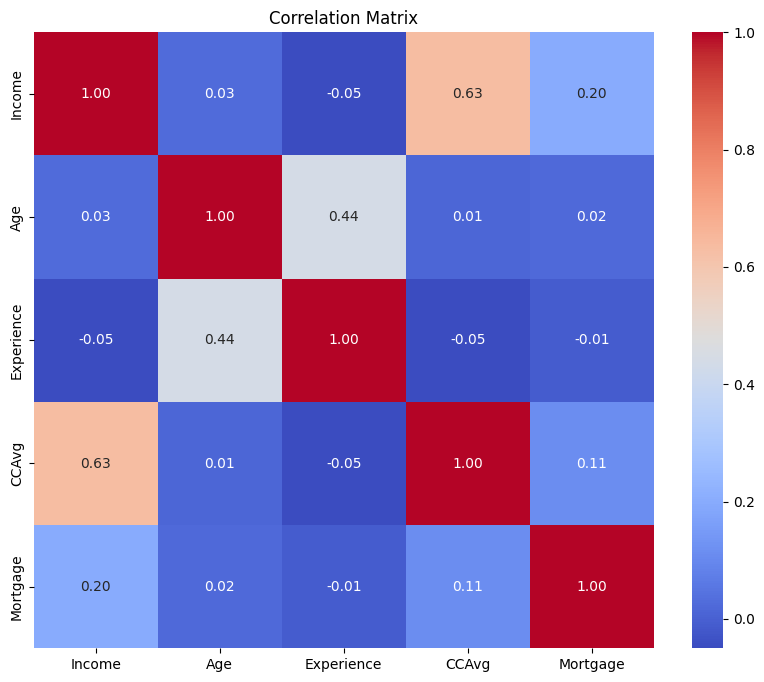

In [57]:
numeric_columns = ['Income', 'Age', 'Experience', 'CCAvg', 'Mortgage']

correlation_matrix = df[numeric_columns].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Mortgage Across Education Levels and Personal Loan Acceptanc

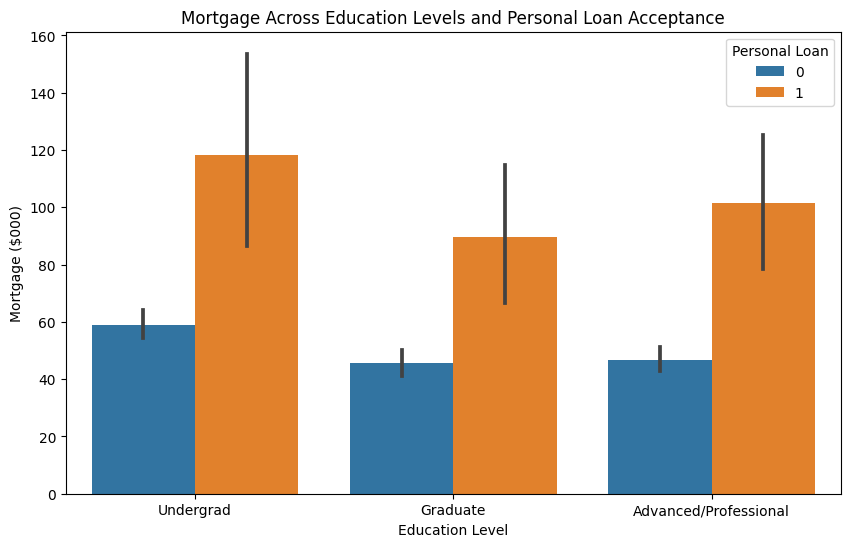

In [60]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Education Level')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across Education Levels and Personal Loan Acceptance')
plt.xticks([0, 1, 2], ['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Mortgage Across Gender and Personal Loan Acceptance

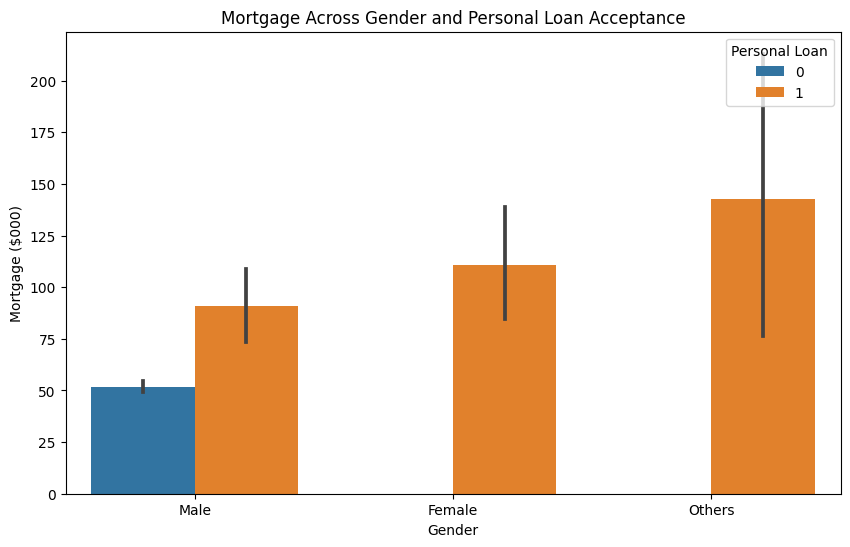

In [61]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Gender')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across Gender and Personal Loan Acceptance')
plt.xticks([0, 1, 2], ['Male', 'Female', 'Others'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Mortgage Across Family size and Personal Loan Acceptance

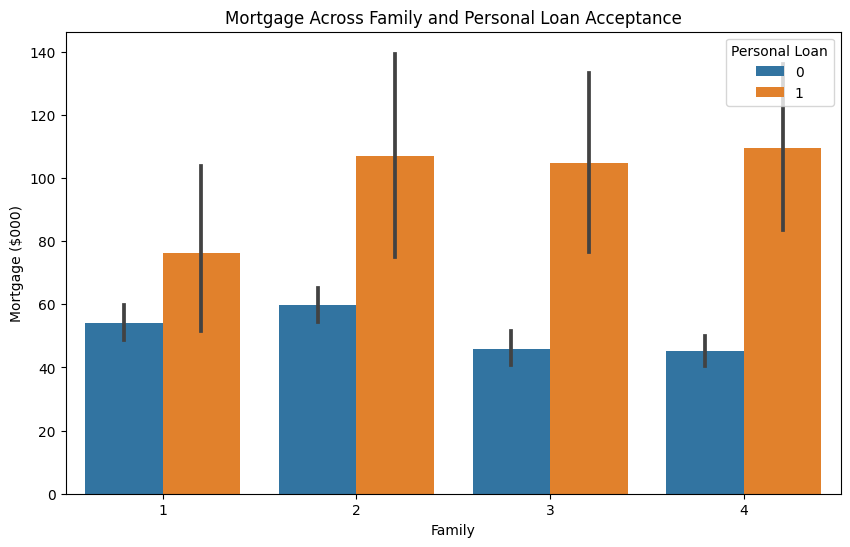

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Family')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across Family and Personal Loan Acceptance')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Mortgage Across Security account and Personal Loan Acceptance

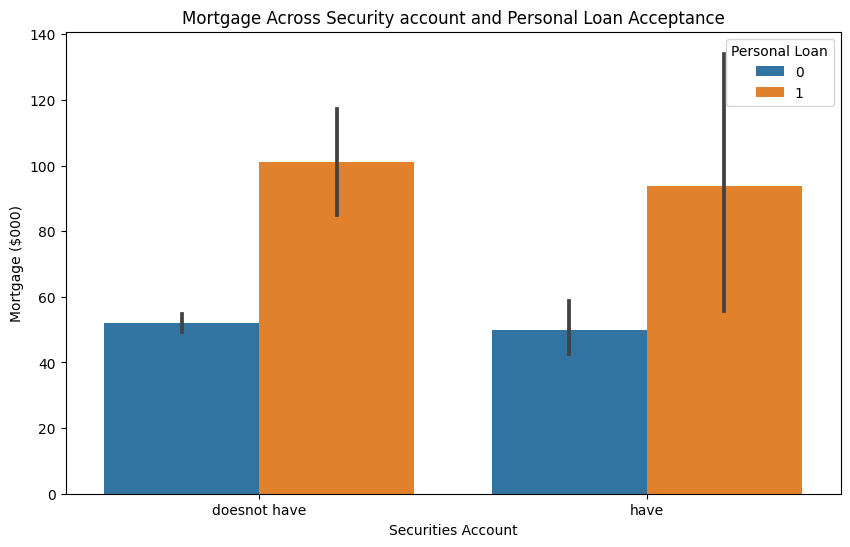

In [63]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Securities Account', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Securities Account')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across Security account and Personal Loan Acceptance')
plt.xticks([0, 1], ['doesnot have', 'have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Mortgage Across CD Account and Personal Loan Acceptance

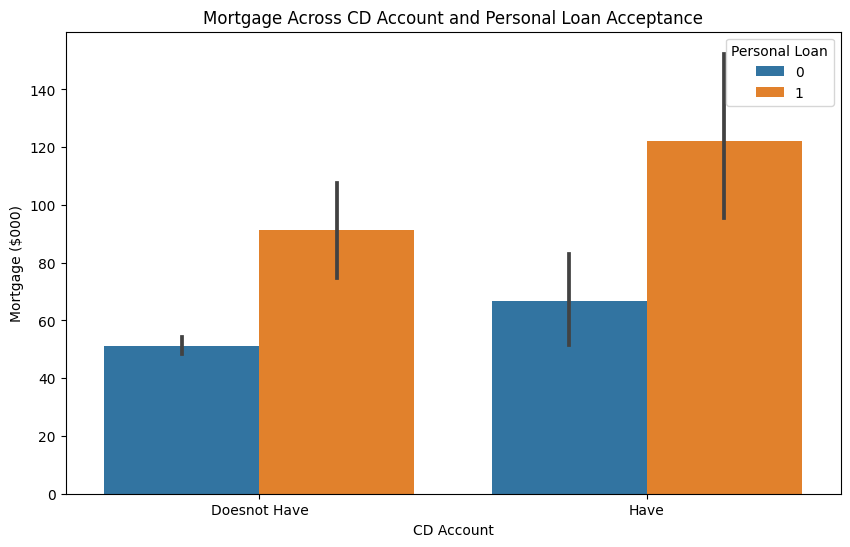

In [64]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CD Account', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('CD Account')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across CD Account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot Have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Mortgage Across using online banking facilities and Personal Loan Acceptance

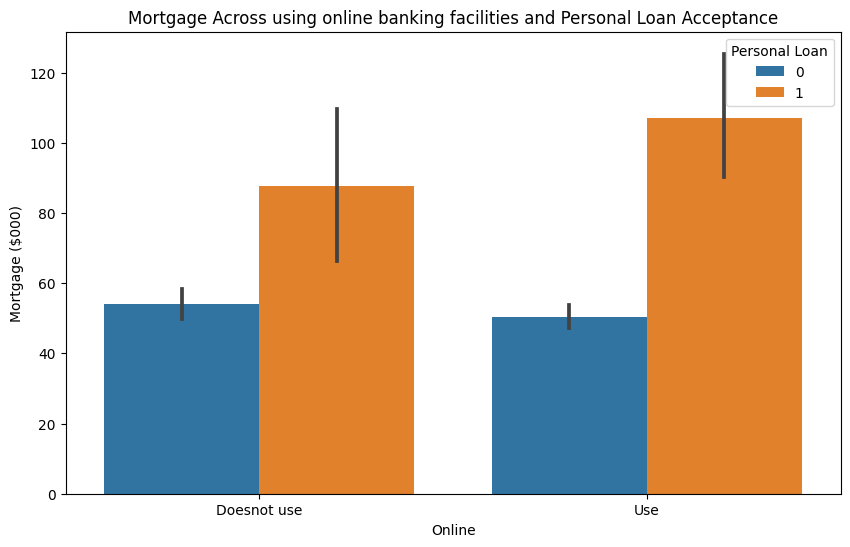

In [66]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Online', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('Online')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across using online banking facilities and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot use', 'Use'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Mortgage Across using Creditcard and Personal Loan Acceptance

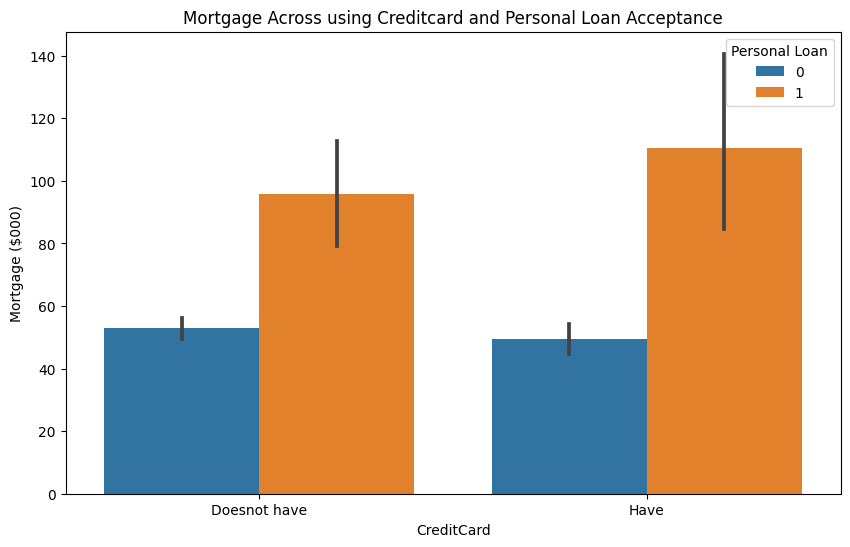

In [67]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CreditCard', y='Mortgage', hue='Personal Loan', data=df)
plt.xlabel('CreditCard')
plt.ylabel('Mortgage ($000)')
plt.title('Mortgage Across using Creditcard and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average spending on credit cards Across Gender and Personal Loan Acceptance

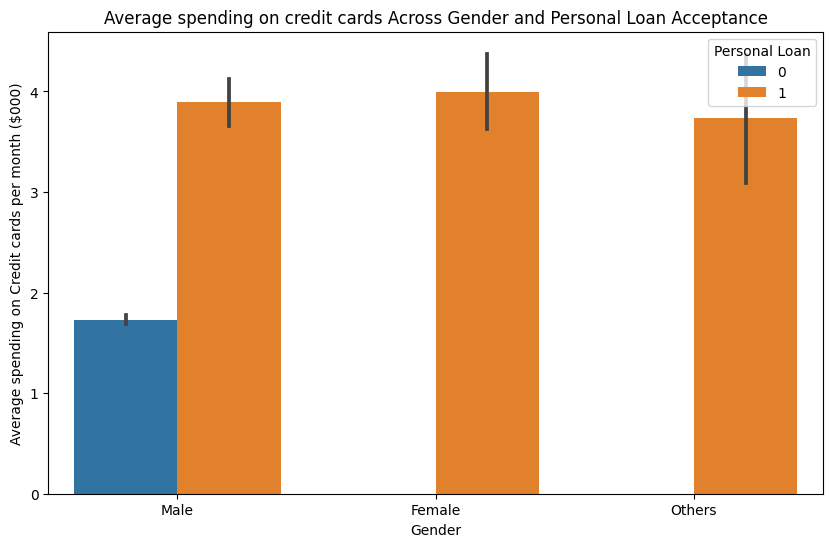

In [68]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Gender', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Gender')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Gender and Personal Loan Acceptance')
plt.xticks([0, 1, 2], ['Male', 'Female', 'Others'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average spending on credit cards Across Family and Personal Loan Acceptance

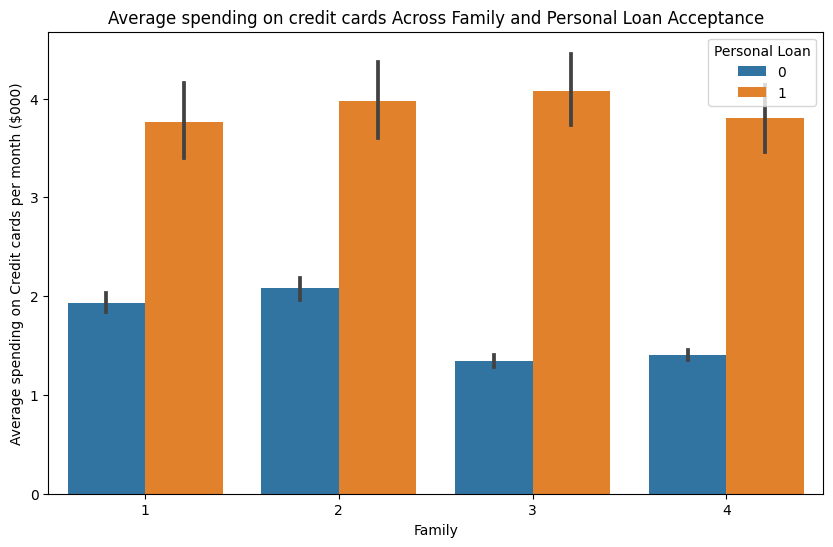

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Family', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Family')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Family and Personal Loan Acceptance')
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average spending on credit cards Across Education and Personal Loan Acceptance

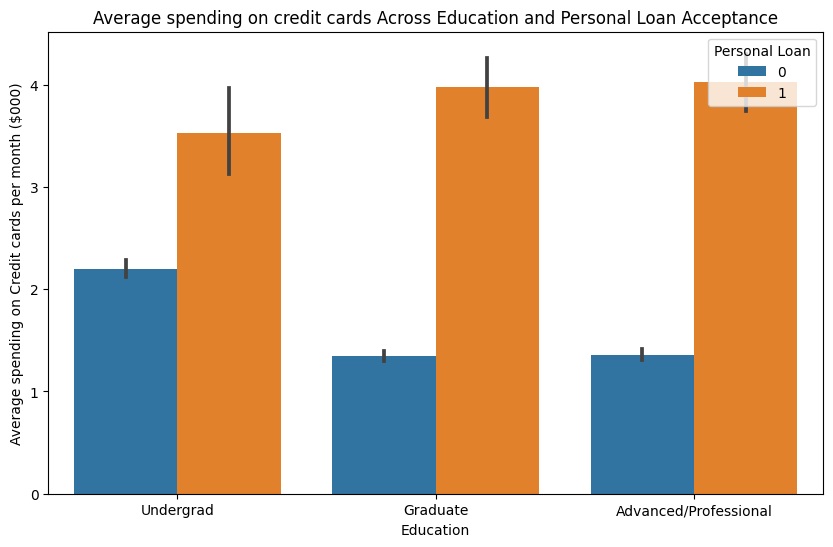

In [70]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Education', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Education')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Education and Personal Loan Acceptance')
plt.xticks([0, 1, 2], ['Undergrad', 'Graduate', 'Advanced/Professional'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average spending on credit cards Across Security account and Personal Loan Acceptance

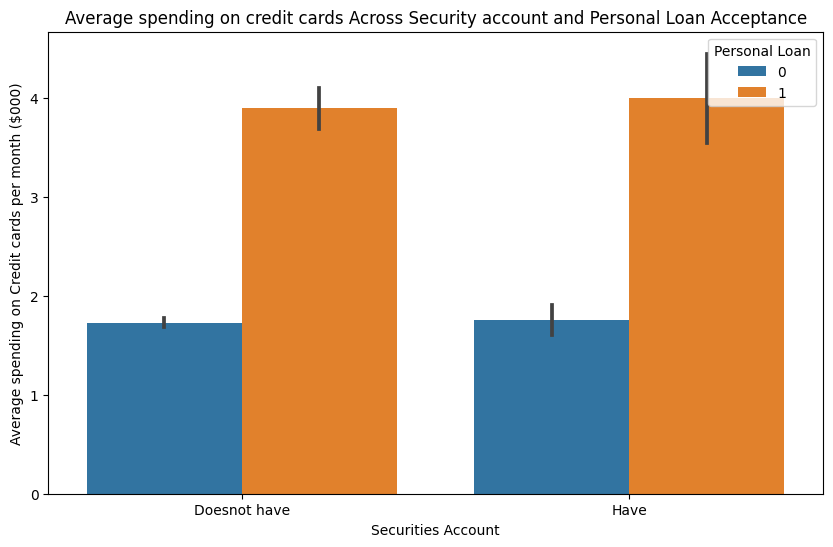

In [71]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Securities Account', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Securities Account')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Security account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average spending on credit cards Across CD account and Personal Loan Acceptance

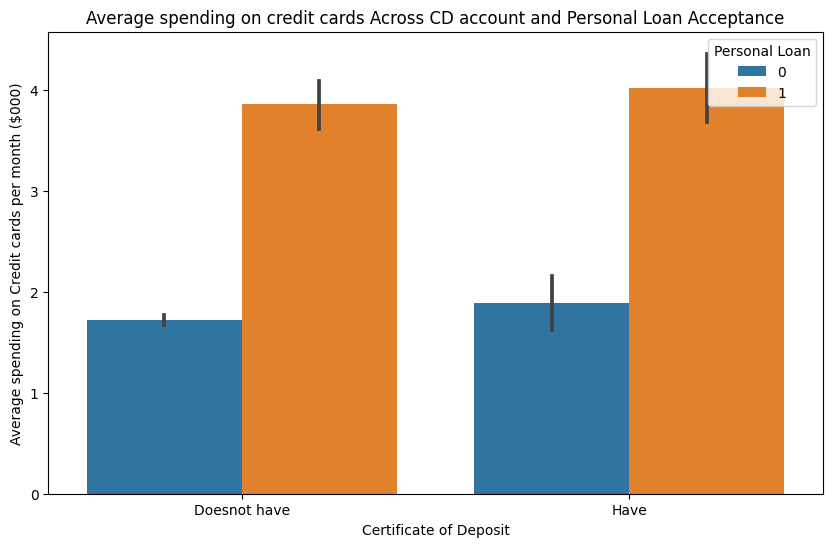

In [72]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CD Account', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Certificate of Deposit')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across CD account and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average spending on credit cards Across online usage and Personal Loan Acceptance

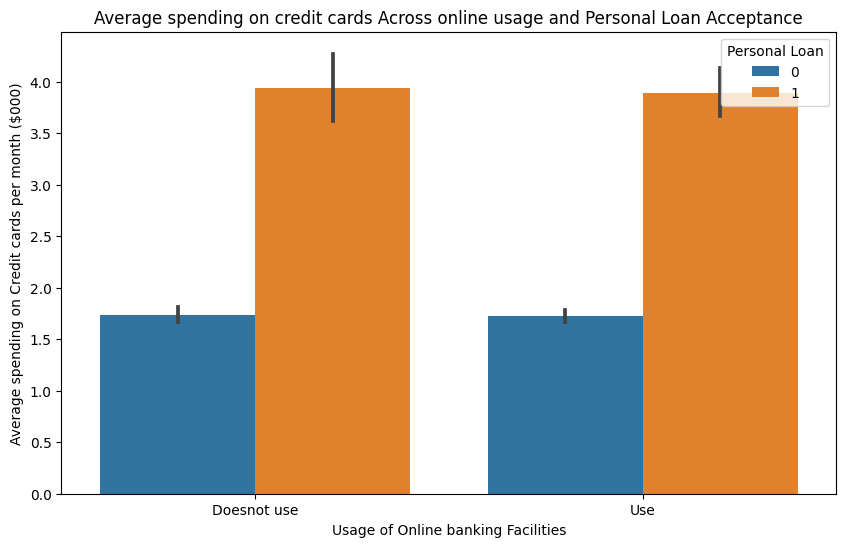

In [73]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Online', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Usage of Online banking Facilities')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across online usage and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot use', 'Use'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Average spending on credit cards Across Creditcard and Personal Loan Acceptance

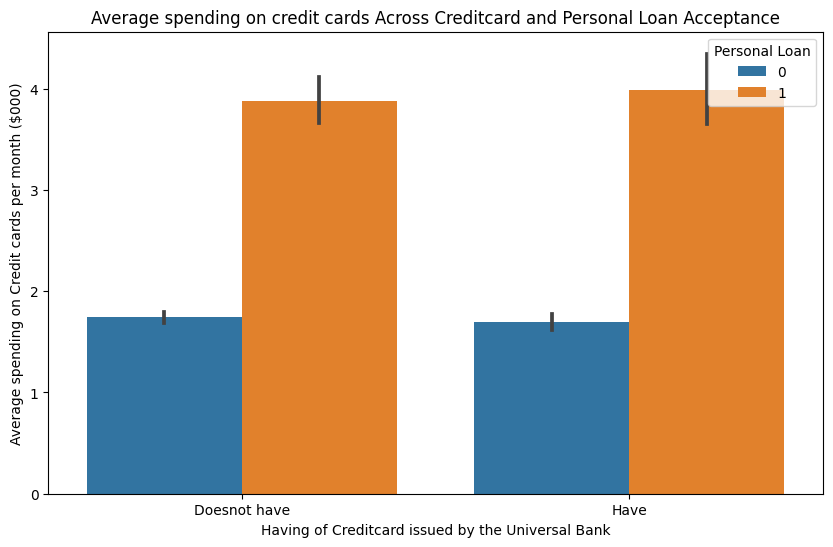

In [74]:
plt.figure(figsize=(10, 6))
sns.barplot(x='CreditCard', y='CCAvg', hue='Personal Loan', data=df)
plt.xlabel('Having of Creditcard issued by the Universal Bank')
plt.ylabel('Average spending on Credit cards per month ($000)')
plt.title('Average spending on credit cards Across Creditcard and Personal Loan Acceptance')
plt.xticks([0, 1], ['Doesnot have', 'Have'])
plt.legend(title='Personal Loan', loc='upper right')
plt.show()

## Personal Loan Acceptance by Top 20 ZIP Codes

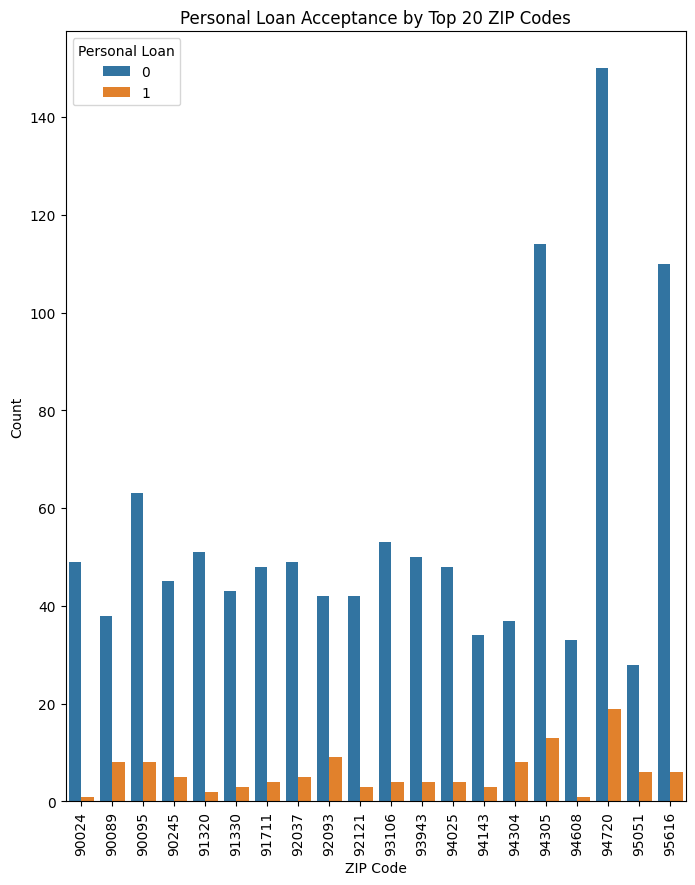

In [81]:
top_zipcode = df['ZIP Code'].value_counts().nlargest(20).index
df_top_zipcode = df[df['ZIP Code'].isin(top_zipcode)]

plt.figure(figsize=(8, 10))
sns.countplot(x='ZIP Code', hue='Personal Loan', data=df_top_zipcode)
plt.xlabel('ZIP Code')
plt.ylabel('Count')
plt.title('Personal Loan Acceptance by Top 20 ZIP Codes')
plt.legend(title='Personal Loan')
plt.xticks(rotation=90)
plt.show()

## Personal Loan Acceptance by Experience

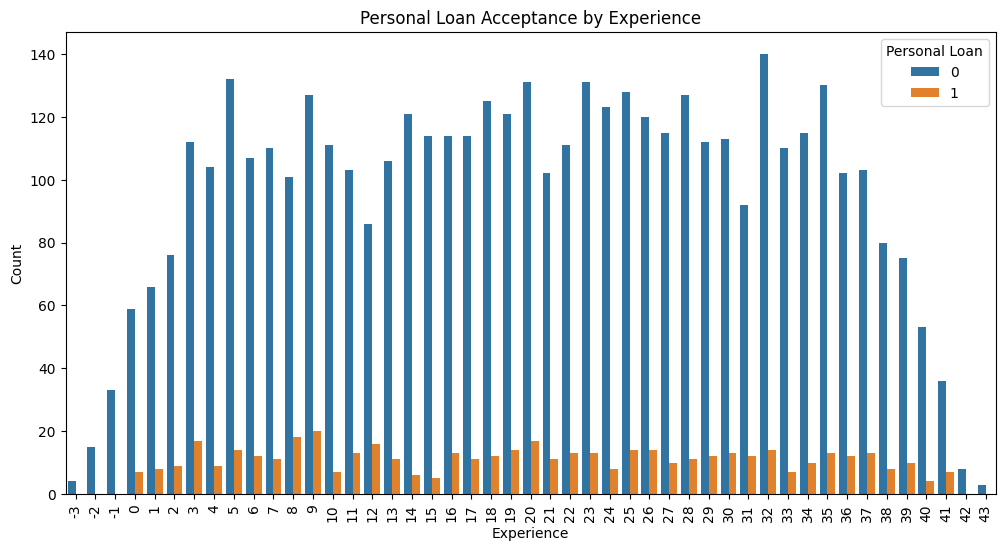

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Experience', hue='Personal Loan', data=df)
plt.xlabel('Experience')
plt.ylabel('Count')
plt.title('Personal Loan Acceptance by Experience')
plt.xticks(rotation=90)
plt.legend(title='Personal Loan')
plt.show()

## Personal Loan Acceptance by Age

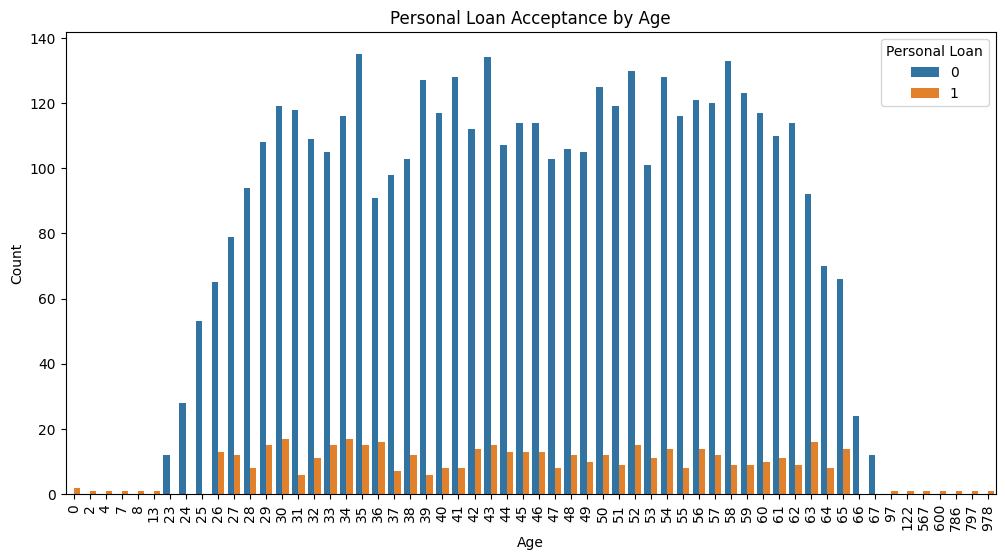

In [83]:
plt.figure(figsize=(12, 6))
sns.countplot(x='Age', hue='Personal Loan', data=df)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Personal Loan Acceptance by Age')
plt.xticks(rotation=90)
plt.legend(title='Personal Loan')
plt.show()

## Distribution of CCAvg with respect to Personal Loan Acceptance

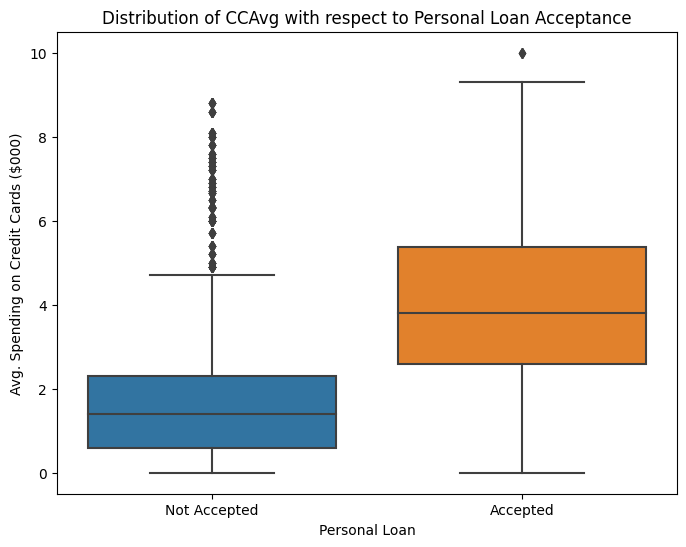

In [88]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='CCAvg', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Avg. Spending on Credit Cards ($000)')
plt.title('Distribution of CCAvg with respect to Personal Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

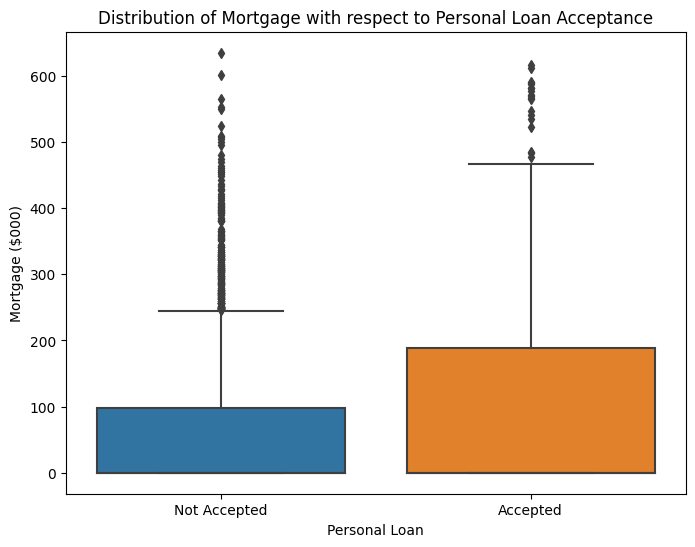

In [87]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='Mortgage', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Mortgage ($000)')
plt.title('Distribution of Mortgage with respect to Personal Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

## Distribution of Experience with respect to Personal Loan Acceptance

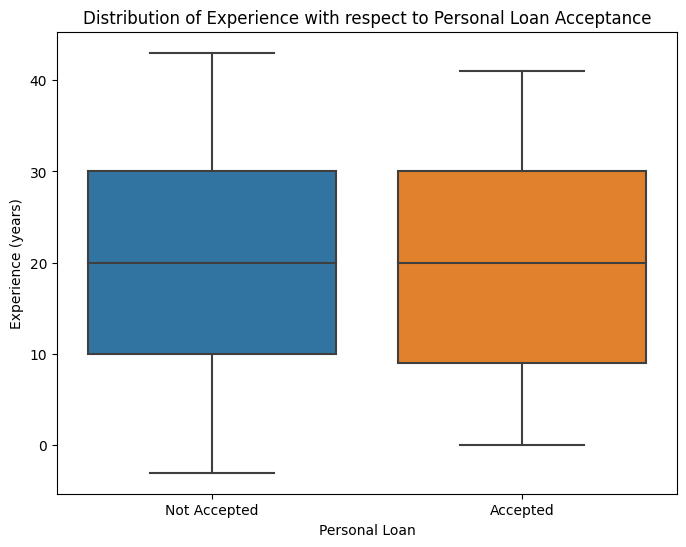

In [89]:
plt.figure(figsize=(8, 6))
sns.boxplot(x='Personal Loan', y='Experience', data=df)
plt.xlabel('Personal Loan')
plt.ylabel('Experience (years)')
plt.title('Distribution of Experience with respect to Personal Loan Acceptance')
plt.xticks([0, 1], ['Not Accepted', 'Accepted'])
plt.show()

## Personal Loan Acceptance based on Age and Income

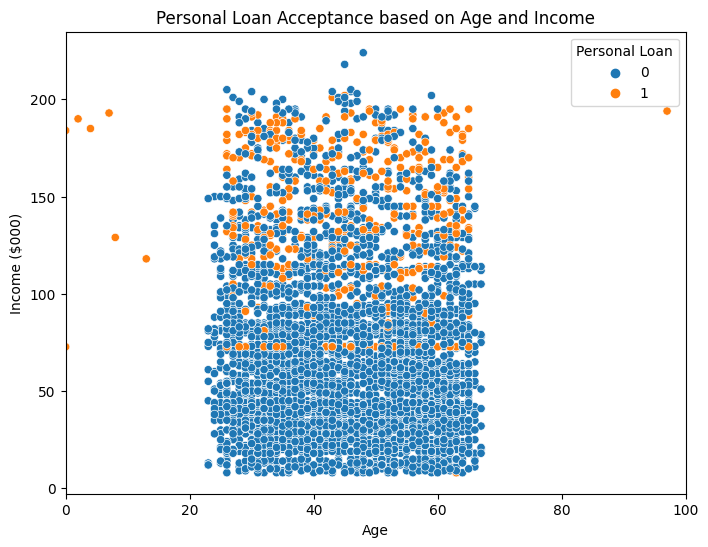

In [92]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Age', y='Income', hue='Personal Loan', data=df)
plt.xlabel('Age')
plt.ylabel('Income ($000)')
plt.title('Personal Loan Acceptance based on Age and Income')
plt.legend(title='Personal Loan')
plt.xlim(0, 100)
plt.show()

## Personal Loan Acceptance based on Age and Mortgage

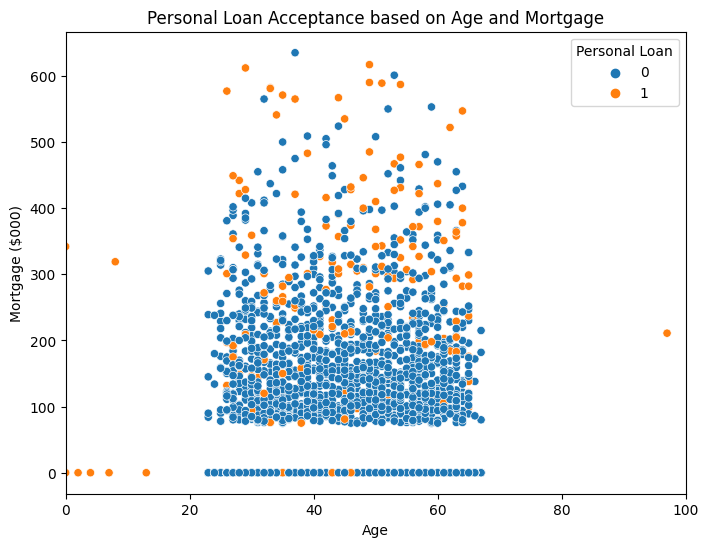

In [97]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Age', y='Mortgage', data=df, hue='Personal Loan')
plt.xlabel('Age')
plt.ylabel('Mortgage ($000)')
plt.title('Personal Loan Acceptance based on Age and Mortgage')
plt.legend(title='Personal Loan')
plt.xlim(0, 100)
plt.show()

## Personal Loan Acceptance based on Age and CCAvg

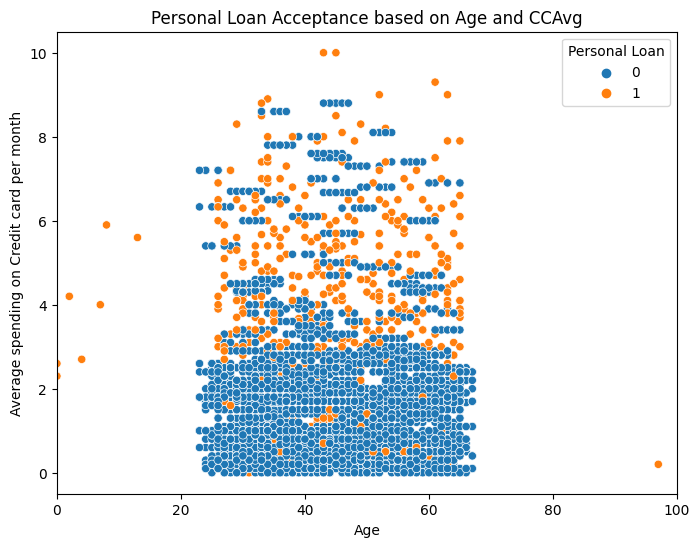

In [98]:
plt.figure(figsize=(8, 6))
scatter = sns.scatterplot(x='Age', y='CCAvg', data=df, hue='Personal Loan')
plt.xlabel('Age')
plt.ylabel('Average spending on Credit card per month')
plt.title('Personal Loan Acceptance based on Age and CCAvg')
plt.legend(title='Personal Loan')
plt.xlim(0, 100)
plt.show()